# 線形カルマンフィルタ＆スムーザーの実装

## システムモデル
$$
x_{k+1} = x_k + v_k\\
y_k = x_k + w_k
$$

## Reference
+ https://qiita.com/hanon/items/7f03621414c59f06d7ca


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)

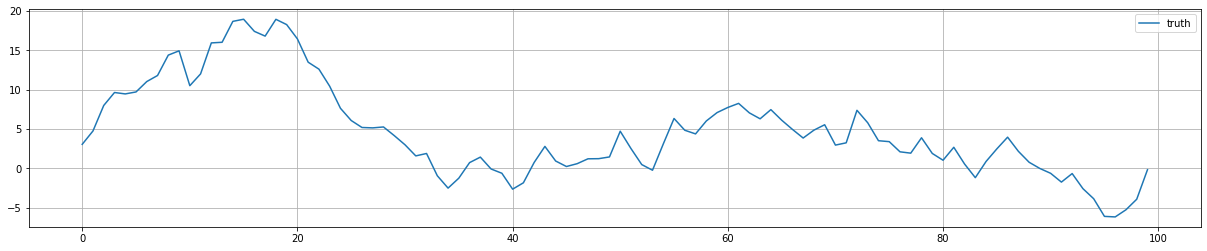

In [2]:
time = range(100)

x_truth = 0  # 初期値
sigma2_v = 3
sigma2_w = 7
log_x_truth = []
log_y = []

# generate data
for i in time:
    x_truth = x_truth + np.random.normal(0, np.sqrt(sigma2_v))
    y = x_truth + np.random.normal(0, np.sqrt(sigma2_w))
    log_x_truth.append(x_truth)
    log_y.append(y)
    
plt.figure(figsize=(21,4))
plt.plot(time, log_x_truth, label="truth")
plt.grid(True)
plt.legend()
plt.show()

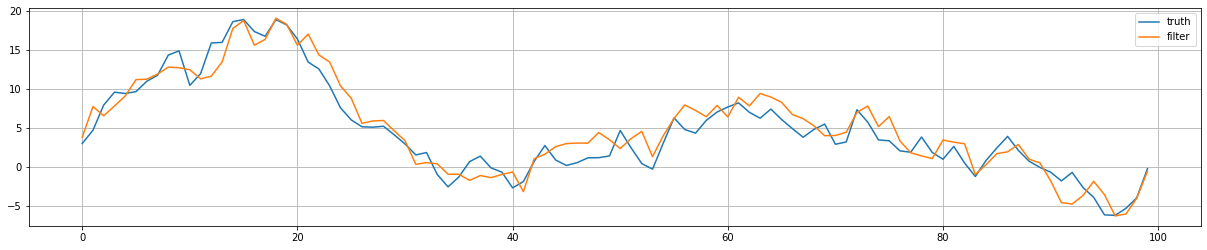

In [3]:
x_filter = 0  # 初期値
p_filter = 100  # 初期値

log_x_filter = []
log_p_filter = []
log_gain = []

# kalman filter
for i in time:
    # predict
    x_predict = x_filter
    p_predict = p_filter + sigma2_v
    gain = p_predict / (p_predict + sigma2_w)
    
    # filter
    x_filter = x_predict + gain * (log_y[i] - x_predict)
    p_filter = (1 - gain) * p_predict
    log_x_filter.append(x_filter)
    log_p_filter.append(p_filter)
    log_gain.append(gain)

plt.figure(figsize=(21,4))
plt.plot(time, log_x_truth, label="truth")
plt.plot(time, log_x_filter, label="filter")
plt.grid(True)
plt.legend()
plt.show()

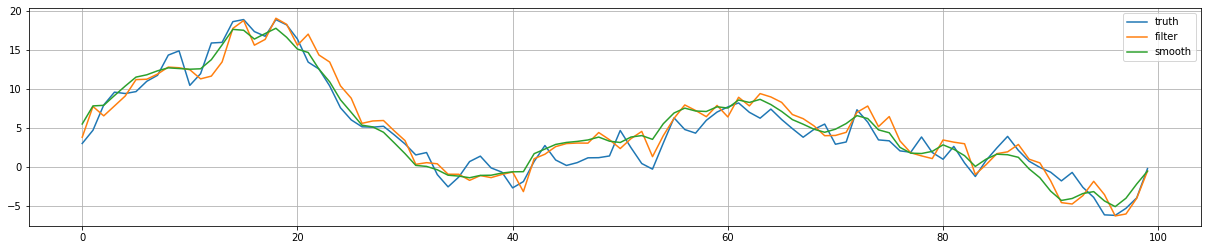

In [4]:
log_x_smooth = []
log_p_smooth = []

# kalman smoother
for i in reversed(time):
    if i == time[-1]:
        x_smooth = log_x_filter[i]
        p_smooth = log_p_filter[i]
    else:
        # predict
        x_predict = log_x_filter[i]
        p_predict = log_p_filter[i] + sigma2_v
        gain = log_p_filter[i+1] / p_predict
        
        # smooth
        x_smooth = log_x_filter[i] + (gain * (x_smooth - x_predict))
        p_smooth = log_p_filter[i] + (gain * (p_smooth - p_predict) * gain)
    log_x_smooth.insert(0, x_smooth)
    log_p_smooth.insert(0, p_smooth)

plt.figure(figsize=(21,4))
plt.plot(time, log_x_truth, label="truth")
plt.plot(time, log_x_filter, label="filter")
plt.plot(time, log_x_smooth, label="smooth")
plt.grid(True)
plt.legend()
plt.show()